# Data Preprocessing

The following tutorial contains Python examples for data preprocessing. You should refer to the "Data" chapter of the "Introduction to Data Mining" book (slides are available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.ipynb.


O pré-processamento de dados consiste em um amplo conjunto de técnicas para limpeza, seleção e transformação de dados para aprimorar a análise de mineração de dados. Leia as instruções passo a passo abaixo com cuidado. Para executar o código, clique na célula correspondente e pressione as teclas SHIFT-ENTER simultaneamente.

## 4.1 Problemas de qualidade de dados

A baixa qualidade dos dados pode ter um efeito adverso na mineração de dados. Entre os problemas comuns de qualidade de dados estão ruído, valores discrepantes, valores ausentes e dados duplicados. Esta seção apresenta exemplos de código Python para tratar alguns desses problemas de qualidade de dados. Começamos com um conjunto de dados de exemplo do repositório de aprendizado de máquina da UCI que contém informações sobre pacientes com câncer de mama. Primeiro, faremos o download do conjunto de dados usando a função Pandas read_csv() e exibiremos seus primeiros 5 pontos de dados.

**<font color="red">Code:</font>**

In [17]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Valores faltantes  (Missing Values)

Não é incomum que um objeto não tenha um ou mais valores de atributo. Em alguns casos, as informações não foram coletadas; enquanto em outros casos, alguns atributos são inaplicáveis às instâncias de dados. Esta seção apresenta exemplos das diferentes abordagens para lidar com valores ausentes.

De acordo com a descrição dos dados (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), os valores omissos são codificados como '?' Nos dados originais. Nossa primeria tareda é converter os valores ausentes em NaNs. Podemos então contar o número de valores ausentes em cada coluna dos dados.
**<font color="red">Code:</font>**

In [18]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Observe que apenas a coluna 'Bare Nuclei' contém valores omissos. No exemplo a seguir, os valores ausentes na coluna "Bare Nuclei" são substituídos pelo valor mediano dessa coluna. Os valores antes e depois da substituição são mostrados para um subconjunto dos pontos de dados.

**<font color="red">Code:</font>**

In [19]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


Em vez de substituir os valores ausentes, outra abordagem comum é descartar os pontos de dados que contêm valores ausentes. Isso pode ser feito facilmente aplicando a função dropna () ao quadro de dados.
**<font color="red">Code:</font>**

In [20]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### Outliers (Ruídos)

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

Os outliers são instâncias de dados com características consideravelmente diferentes do restante do conjunto de dados. No código de exemplo abaixo, desenharemos um boxplot para identificar as colunas na tabela que contêm outliers. Observe que os valores em todas as colunas (exceto 'Bare Nuclei') são originalmente armazenados como 'int64', enquanto os valores na coluna 'Bare Nuclei' são armazenados como objetos de string (já que a coluna contém strings como '?' representando valores ausentes). Assim, devemos converter a coluna em valores numéricos antes de criar o boxplot. Caso contrário, a coluna não será exibida ao desenhar o boxplot.

**<font color="red">Code:</font>**

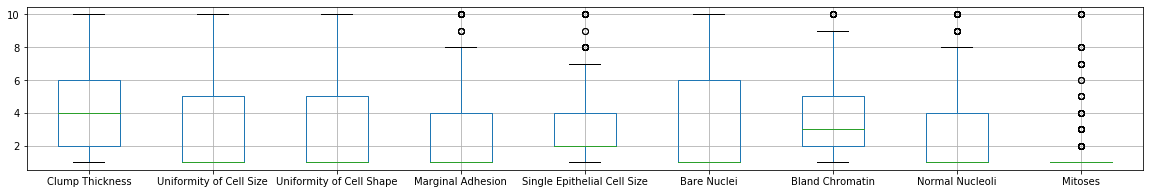

In [21]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3));

Os boxplots sugerem que apenas 5 das colunas (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contêm valores anormalmente altos. Para descartar os outliers, podemos calcular a pontuação Z para cada atributo e remover as instâncias que contêm atributos com pontuação Z anormalmente alta ou baixa (por exemplo, se Z > 3 ou Z <= -3).

**<font color="red">Code:</font>**

O código a seguir mostra os resultados da padronização das colunas dos dados. Observe que os valores omissos (NaN) não são afetados pelo processo de padronização.

In [22]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


**<font color="red">Code:</font>**

O código a seguir mostra os resultados de descartar colunas com Z> 3 ou Z <= -3.

In [23]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


### Dados duplicados

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. 

Alguns conjuntos de dados, especialmente aqueles obtidos pela fusão de várias fontes de dados, podem conter duplicações ou instâncias quase duplicadas. O termo deduplicação é freqüentemente usado para se referir ao processo de lidar com problemas de dados duplicados.

**<font color="red">Code:</font>**

No exemplo a seguir, primeiro verificamos instâncias duplicadas no conjunto de dados de câncer de mama.

In [24]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [25]:
data.loc[dups][:5]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
28,2,1,1,1,2,1,2,1,1,2
35,2,1,1,1,2,1,2,1,1,2
48,4,1,1,3,2,1,3,1,1,2
64,1,1,1,1,2,1,2,1,1,2
66,4,1,1,1,2,1,3,1,1,2


A função duplicated () retornará uma matriz booleana que indica se cada linha é uma duplicata de uma linha anterior na tabela. Os resultados sugerem que há 236 linhas duplicadas no conjunto de dados do câncer de mama. Por exemplo, a instância com índice de linha 11 possui valores de atributo idênticos à instância com índice de linha 28. Embora essas linhas duplicadas possam corresponder a amostras para indivíduos diferentes, neste exemplo hipotético, supomos que as duplicatas são amostras obtidas do mesmo indivíduo e ilustre abaixo como remover as linhas duplicadas.

**<font color="red">Code:</font>**

In [26]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## Agregação

A agregação de dados é uma tarefa de pré-processamento em que os valores de dois ou mais objetos são combinados em um único objeto. A motivação para agregação inclui (1) reduzir o tamanho dos dados a serem processados, (2) alterar a granularidade da análise (de escala fina para escala mais grosseira) e (3) melhorar a estabilidade dos dados.

No exemplo abaixo, usaremos os dados da série temporal de precipitação diária para uma estação meteorológica localizada no Detroit Metro Airport. Os dados brutos foram obtidos do site Climate Data Online (https://www.ncdc.noaa.gov/cdo-web/). A série temporal de precipitação diária será comparada com os valores mensais.

**<font color="red">Code:</font>**

O código abaixo carrega os dados da série temporal de precipitação e desenha um gráfico de linha das suas séries temporais diárias.

In [27]:
daily = pd.read_csv('DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily.head()

,DATE,PRCP
DATE,,
2001-01-01,1/1/2001,0.00
2001-01-02,1/2/2001,0.00
2001-01-03,1/3/2001,0.00
2001-01-04,1/4/2001,0.04
2001-01-05,1/5/2001,0.14


Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

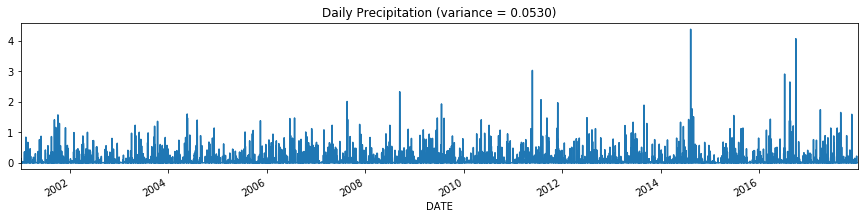

In [28]:
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Observe que a série temporal diária parece ser bastante caótica e varia significativamente de um passo para outro. As séries temporais podem ser agrupadas e agregadas por mês para obter os valores totais mensais de precipitação. A série temporal resultante parece variar mais suavemente em comparação com a série temporal diária.

**<font color="red">Code:</font>**

In [29]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()


In [30]:
monthly[:10]

DATE
2001-01-31    0.84
2001-02-28    2.55
2001-03-31    0.83
2001-04-30    1.27
2001-05-31    3.16
2001-06-30    1.65
2001-07-31    2.00
2001-08-31    2.33
2001-09-30    4.20
2001-10-31    6.27
Freq: M, Name: PRCP, dtype: float64

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

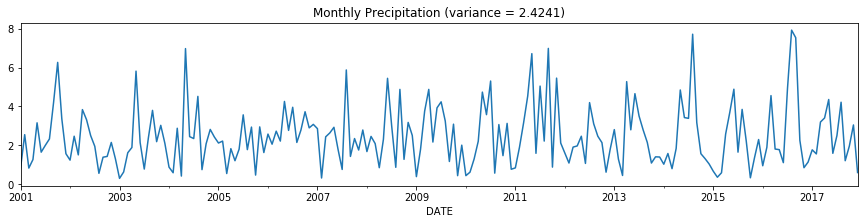

In [31]:
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

No exemplo abaixo, as séries temporais diárias de precipitação são agrupadas e agregadas por ano para obter os valores de precipitação anuais.

**<font color="red">Code:</font>**

In [32]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
annual[:5]

DATE
2001-12-31    30.04
2002-12-31    23.67
2003-12-31    26.69
2004-12-31    29.15
2005-12-31    23.07
Freq: A-DEC, Name: PRCP, dtype: float64

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

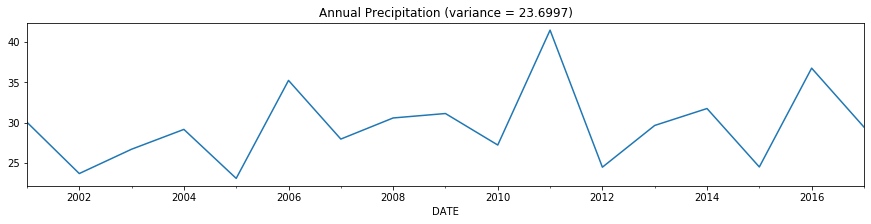

In [33]:
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

Amostragem é uma abordagem comumente usada para facilitar (1) a redução de dados para análise exploratória de dados e ampliação de algoritmos para aplicações de big data e (2) quantificação de incertezas devido a distribuições de dados variáveis. Existem vários métodos disponíveis para amostragem de dados, como amostragem sem substituição, onde cada instância selecionada é removida do conjunto de dados e amostragem com substituição, onde cada instância selecionada não é removida, permitindo que ela seja selecionada mais de uma vez na amostra .

No exemplo abaixo, aplicaremos amostragem com substituição e sem substituição ao conjunto de dados de câncer de mama obtido no repositório de aprendizado de máquina da UCI.

**<font color="red">Code:</font>**

Inicialmente exibimos os cinco primeiros registros da tabela.

In [34]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


No código a seguir, uma amostra de tamanho 3 é selecionada aleatoriamente (sem substituição) dos dados originais.

**<font color="red">Code:</font>**

In [35]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
218,6,10,7,7,6,4,8,10,2,4
212,1,1,1,1,2,1,3,1,1,2
120,1,1,2,2,2,1,3,1,1,2


No próximo exemplo, selecionamos aleatoriamente 1% dos dados (sem substituição) e exibimos as amostras selecionadas. O argumento random_state da função especifica o valor inicial do gerador de números aleatórios.

**<font color="red">Code:</font>**

In [36]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


Por fim, realizamos uma amostragem com substituição para criar uma amostra cujo tamanho é igual a 1% de todos os dados. Você deve poder observar instâncias duplicadas na amostra ao aumentar o tamanho da amostra.

**<font color="red">Code:</font>**

In [37]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


## Discretização

Discretização é uma etapa de pré-processamento de dados que é frequentemente usada para transformar um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra dois métodos de discretização simples, mas amplamente utilizados (largura igual e freuquência igual), aplicados ao atributo 'Clump Thickness' do conjunto de dados de câncer de mama.

Primeiro, plotamos um histograma que mostra a distribuição dos valores dos atributos. A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

**<font color="red">Code:</font>**

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

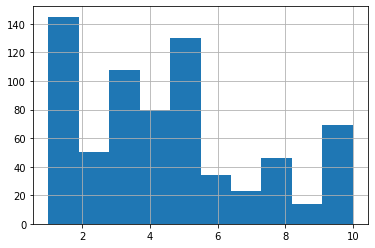

In [38]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

Para o método de largura igual, podemos aplicar a função cut() para discretizar o atributo em 4 bins de larguras de intervalo semelhantes. A função value_counts() pode ser usada para determinar o número de instâncias em cada bin.

**<font color="red">Code:</font>**

In [39]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

Para o método de frequência igual, a função qcut() pode ser usada para particionar os valores em 4 compartimentos, de forma que cada bin tenha quase o mesmo número de instâncias.

**<font color="red">Code:</font>**

In [40]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64


**<font color='blue'>References:</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196. 

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/]. 